In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("/Users/rpandey1/Desktop/PracticePrograms/sample_data/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df["country"].nunique()

167

In [8]:
df.isnull().mean()

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [ ]:
# df["exports"] = df["exports"] * df["gdpp"]/100
# df["imports"] = df["imports"] * df["gdpp"]/100
# df["health"] = df["health"] * df["gdpp"]/100

In [9]:
def calc_abs_values(df, cols, target_col):
    for col in cols:
        df[col] = df[col] * df[target_col]/100
    return df

#"exports", "imports", "health" columns are percentage of "gdpp"
df = calc_abs_values(df, ["exports", "imports", "health"], "gdpp")

In [10]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [11]:
#dropping country column because it will not contribute to feature.
df1 = df.drop("country", axis=1)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1_scaled = scaler.fit_transform(df1)

In [15]:
df1_scaled

array([[4.26484907e-01, 2.95093321e-04, 3.36341972e-03, ...,
        4.75345168e-01, 7.36593060e-01, 3.07342821e-03],
       [6.81596884e-02, 6.22655666e-03, 2.94856458e-02, ...,
        8.71794872e-01, 7.88643533e-02, 3.68334145e-02],
       [1.20253165e-01, 9.31468360e-03, 2.00167874e-02, ...,
        8.75739645e-01, 2.74447950e-01, 4.03649935e-02],
       ...,
       [1.00778968e-01, 5.12723048e-03, 8.87582515e-03, ...,
        8.08678501e-01, 1.26182965e-01, 1.02988479e-02],
       [2.61441091e-01, 2.13292722e-03, 6.36206303e-03, ...,
        6.98224852e-01, 5.55205047e-01, 1.02988479e-02],
       [3.91918208e-01, 2.93402035e-03, 8.45852168e-03, ...,
        3.92504931e-01, 6.70347003e-01, 1.17305692e-02]])

In [16]:
from sklearn.cluster import KMeans
k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(df1_scaled)

KMeans(n_clusters=3)

In [17]:
output = kmeans.predict(df1_scaled)
output

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [18]:
df["cluster"] = output
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


/var/folders/5_/zntk1nwd65zfpzkcd8dj201m0000gq/T/ipykernel_16211/2026646771.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["cluster"], y=df["gdpp"], ci=None)


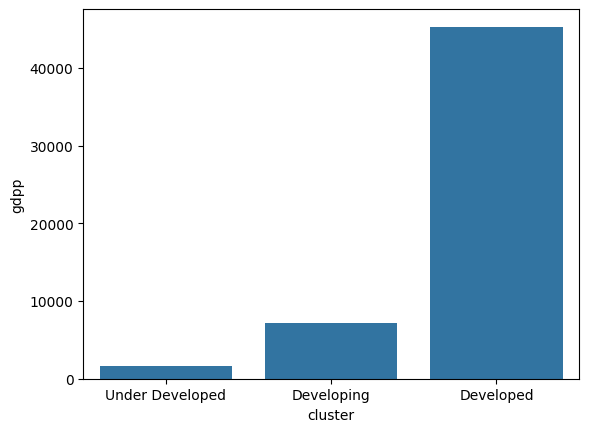

In [23]:
df["cluster"]= df["cluster"].map({0: "Under Developed", 1:"Developing", 2: "Developed"})
sns.barplot(x=df["cluster"], y=df["gdpp"], ci=None)
plt.show()

In [24]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Under Developed
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Developing
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Developing
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Under Developed
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Developing


In [38]:
np.where(df["country"] == "Pakistan")

(array([116]),)

In [33]:
df.loc[[69]]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
69,India,58.8,305.1,54.675,365.85,4410,8.98,66.2,2.6,1350,Developing


In [37]:
df.loc[[158]]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
158,United Kingdom,5.2,10969.8,3749.96,11981.2,36200,1.57,80.3,1.92,38900,Developed


In [39]:
df.loc[[116]]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
116,Pakistan,92.1,140.4,22.88,201.76,4280,10.9,65.3,3.85,1040,Under Developed


------------------- child_mort Vs clusters ----------------------------


/var/folders/5_/zntk1nwd65zfpzkcd8dj201m0000gq/T/ipykernel_16211/4051435448.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["cluster"], y=df[i], ci=None)


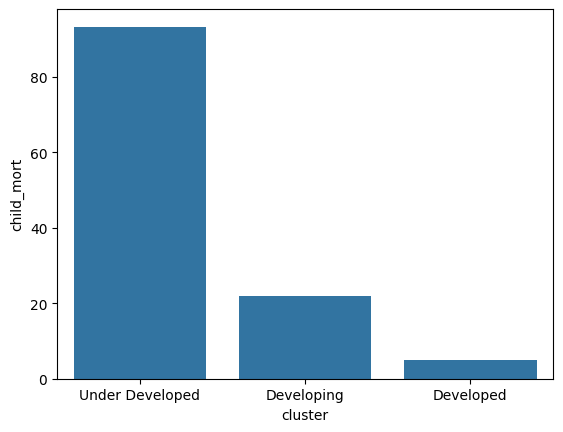

------------------- exports Vs clusters ----------------------------


/var/folders/5_/zntk1nwd65zfpzkcd8dj201m0000gq/T/ipykernel_16211/4051435448.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["cluster"], y=df[i], ci=None)


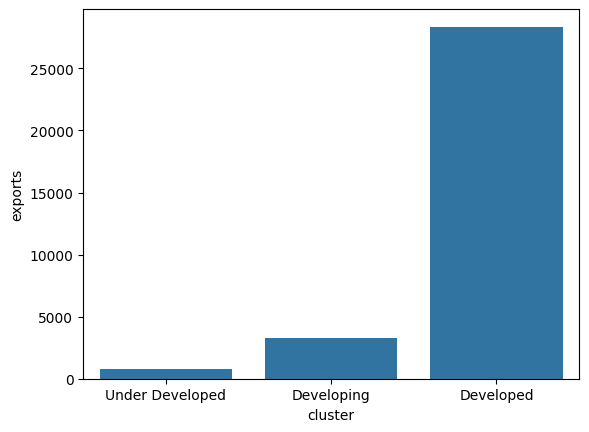

------------------- health Vs clusters ----------------------------


/var/folders/5_/zntk1nwd65zfpzkcd8dj201m0000gq/T/ipykernel_16211/4051435448.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["cluster"], y=df[i], ci=None)


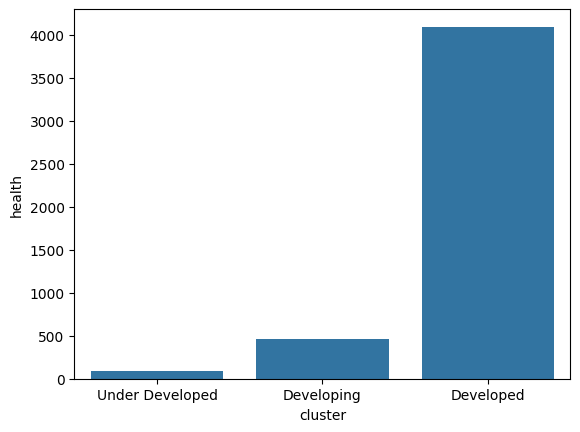

------------------- imports Vs clusters ----------------------------


/var/folders/5_/zntk1nwd65zfpzkcd8dj201m0000gq/T/ipykernel_16211/4051435448.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["cluster"], y=df[i], ci=None)


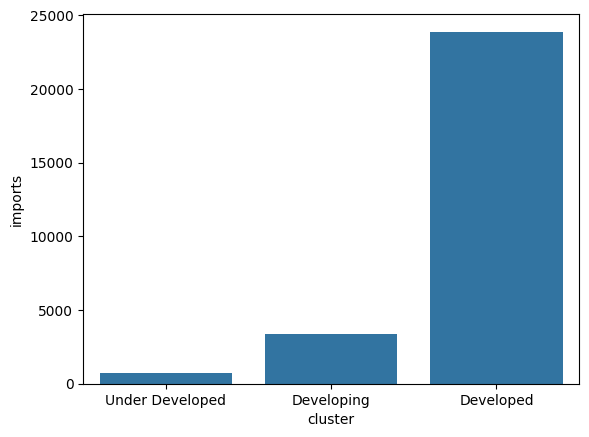

------------------- income Vs clusters ----------------------------


/var/folders/5_/zntk1nwd65zfpzkcd8dj201m0000gq/T/ipykernel_16211/4051435448.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["cluster"], y=df[i], ci=None)


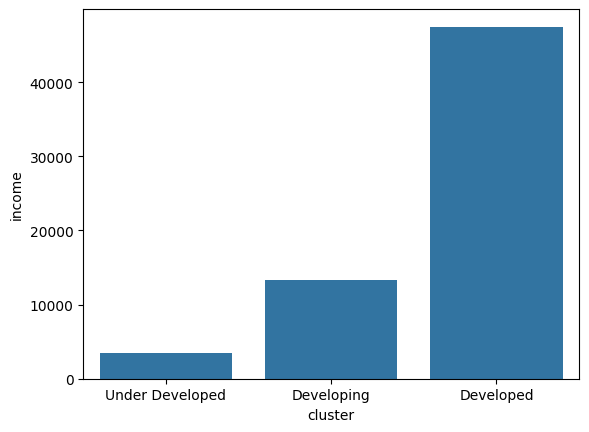

------------------- inflation Vs clusters ----------------------------


/var/folders/5_/zntk1nwd65zfpzkcd8dj201m0000gq/T/ipykernel_16211/4051435448.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["cluster"], y=df[i], ci=None)


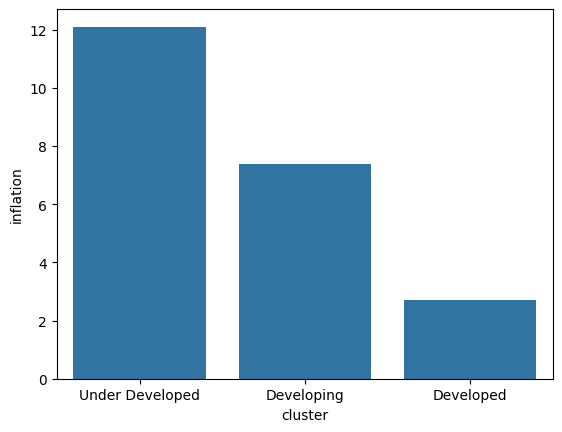

------------------- life_expec Vs clusters ----------------------------


/var/folders/5_/zntk1nwd65zfpzkcd8dj201m0000gq/T/ipykernel_16211/4051435448.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["cluster"], y=df[i], ci=None)


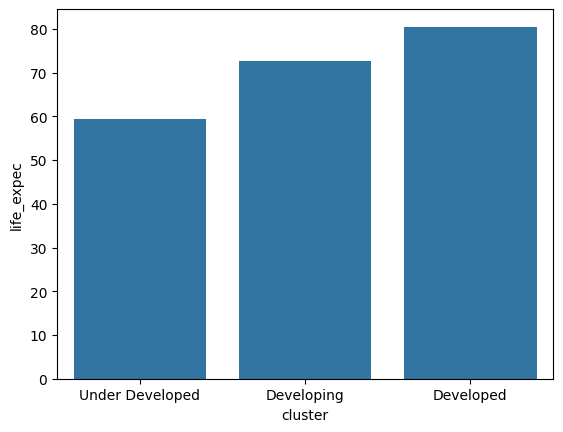

------------------- total_fer Vs clusters ----------------------------


/var/folders/5_/zntk1nwd65zfpzkcd8dj201m0000gq/T/ipykernel_16211/4051435448.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["cluster"], y=df[i], ci=None)


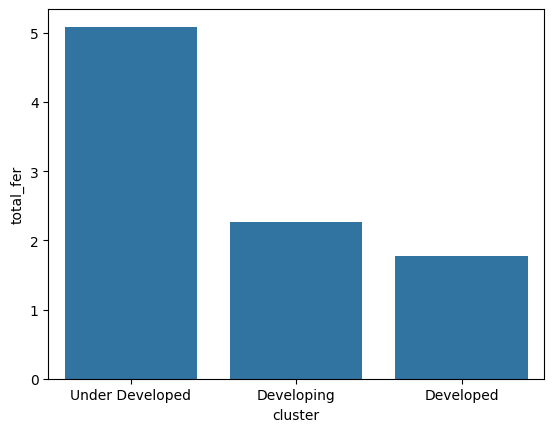

------------------- gdpp Vs clusters ----------------------------


/var/folders/5_/zntk1nwd65zfpzkcd8dj201m0000gq/T/ipykernel_16211/4051435448.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["cluster"], y=df[i], ci=None)


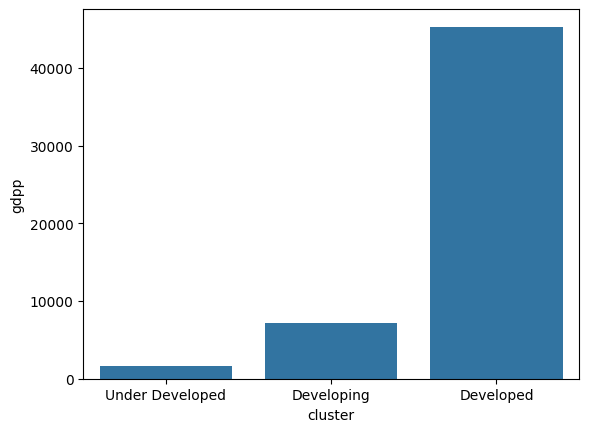

In [40]:
for i in df1.columns:
    print("-------------------",i,"Vs clusters", "----------------------------")
    sns.barplot(x=df["cluster"], y=df[i], ci=None)
    plt.show()